<a href="https://colab.research.google.com/github/hasancatalgol/body_measurement_prediction/blob/main/body_measurement_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Body Measurement Prediction with Regression
![B](https://www.clothingpatterns101.com/images/how-to-measure-drawings.jpg)

## Overview
Body measurement is the process of taking accurate and precise measurements of a person's body in order to create custom-fitted clothing. Tailors use body measurements to create well-fitting garments that complement the unique shape and proportions of an individual's body.

To get accurate measurements, tailors need to measure various parts of the body, such as the chest, waist, hips, inseam, arm length, and shoulder width. They may also need to take additional measurements, such as the neck circumference, sleeve length, and thigh circumference, depending on the type of clothing being made.


### Goal: 
We will apply variety of regression models to this dataset

----

## Part One: Understanding the Background and Data
https://www.kaggle.com/datasets/saurabhshahane/body-measurements-dataset

----


### The Data

There is one simple table for a basic practice

#### Body Measurements _ original_CSV.csv

Column | Definition/Info | Type of Variable
:--- | :-----------: | :-----------------:
Gender | (Male and Female (M=1 & F= 2) (391 Males & 324 Females) | Numeric
Age | (1 year and above) | Numeric
HeadCircumference | (in inches) | Numeric
ShoulderWidth | (in inches) | Numeric
ChestWidth | (in inches) |Numeric
Belly |  (in inches) | Numeric
Waist | (in inches) | Numeric
Hips |  (in inches) | Numeric 
ArmLength |  (in inches) | Numeric
ShoulderToWaist  |  (in inches) | Numeric
WaistToKnee  | (in inches) | Numeric
LegLength |  (in inches) | Numeric
TotalHeight |  from head to toe (in inches) | Numeric

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
df_ = pd.read_csv('Body Measurements _ original_CSV.csv')
df = df_.copy()
df 

,Gender,Age,HeadCircumference,ShoulderWidth,ChestWidth,Belly,Waist,Hips,ArmLength,ShoulderToWaist,WaistToKnee,LegLength,TotalHeight
0,1.0,30,22,18,20,18,14,22,22,25,25,22,52
1,1.0,28,19,22,17,18,21,25,28,23,25,20,56
2,2.0,27,21,18,16,14,10,15,21,18,14,18,53
3,1.0,29,20,20,18,11,19,14,24,21,20,21,45
4,2.0,28,16,14,18,13,11,30,25,22,32,13,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,2.0,13,22,6,14,25,18,30,21,20,16,33,59
712,1.0,10,21,11,12,22,2,26,21,15,14,25,45
713,1.0,4,20,17,11,22,22,22,17,12,12,22,40
714,1.0,13,20,15,14,25,18,30,21,20,16,33,59


In [80]:
def check_df(dataframe):
    types = dataframe.dtypes
    abc = pd.DataFrame({
        'Data Types' : types
     })
    return abc
check_df(df)

,Data Types
Gender,float64
Age,int64
HeadCircumference,int64
ShoulderWidth,int64
ChestWidth,int64
Belly,int64
Waist,int64
Hips,int64
ArmLength,int64
ShoulderToWaist,int64


In [81]:
  print("##################### Shape #####################")
  print(df.shape)

##################### Shape #####################
(716, 13)


In [82]:
def count_missing_value(dataframe):
    #Completely Null Values
    null_count = dataframe.isnull().sum()
    #If there is nan, NaN, Nan in the cell the code piece will find it.
    nan_count = ((dataframe == 'nan') | (dataframe =='NaN') | (dataframe =='Nan')).sum()
    
    empty_count = ((dataframe == ' ') | (dataframe == '')).sum()
    abc = pd.DataFrame({
        'Null_count' : null_count,
        'NaN_count' : nan_count,
        'Empty_count' : empty_count
     })
    return abc
count_missing_value(df)

,Null_count,NaN_count,Empty_count
Gender,1,0,0
Age,0,0,0
HeadCircumference,0,0,0
ShoulderWidth,0,0,0
ChestWidth,0,0,0
Belly,0,0,0
Waist,0,0,0
Hips,0,0,0
ArmLength,0,0,0
ShoulderToWaist,0,0,0


In [83]:
null_value_row = df.loc[df.Gender.isnull()]    
null_value_row

,Gender,Age,HeadCircumference,ShoulderWidth,ChestWidth,Belly,Waist,Hips,ArmLength,ShoulderToWaist,WaistToKnee,LegLength,TotalHeight
536,NaN,9,20,13,11,21,24,11,22,14,15,25,44


**Removing null row**

There is a null value in Gender column and I believe being "Genderless" is not a reason for me to get cancelled.

In [84]:
df.dropna(inplace = True)  
df 

,Gender,Age,HeadCircumference,ShoulderWidth,ChestWidth,Belly,Waist,Hips,ArmLength,ShoulderToWaist,WaistToKnee,LegLength,TotalHeight
0,1.0,30,22,18,20,18,14,22,22,25,25,22,52
1,1.0,28,19,22,17,18,21,25,28,23,25,20,56
2,2.0,27,21,18,16,14,10,15,21,18,14,18,53
3,1.0,29,20,20,18,11,19,14,24,21,20,21,45
4,2.0,28,16,14,18,13,11,30,25,22,32,13,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,2.0,13,22,6,14,25,18,30,21,20,16,33,59
712,1.0,10,21,11,12,22,2,26,21,15,14,25,45
713,1.0,4,20,17,11,22,22,22,17,12,12,22,40
714,1.0,13,20,15,14,25,18,30,21,20,16,33,59


Check if the Null value is gone or gonn't

In [85]:
count_missing_value(df)

,Null_count,NaN_count,Empty_count
Gender,0,0,0
Age,0,0,0
HeadCircumference,0,0,0
ShoulderWidth,0,0,0
ChestWidth,0,0,0
Belly,0,0,0
Waist,0,0,0
Hips,0,0,0
ArmLength,0,0,0
ShoulderToWaist,0,0,0


In [86]:
# Percentile list 
perc = [.00, .05, .20, .40, .50, .60, .80, .90, .95, 1.0] 
  
# List of dtypes to include 
include = ['object', 'float', 'int'] 

df.describe(percentiles = perc, include = include).T

,count,mean,std,min,0%,5%,20%,40%,50%,60%,80%,90%,95%,100%,max
Gender,715.0,1.453147,0.498148,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
Age,715.0,15.349650,11.837401,1.0,1.0,3.0,6.0,10.0,11.0,14.0,24.0,31.0,38.3,68.0,68.0
HeadCircumference,715.0,20.574825,3.745912,5.0,5.0,16.0,19.0,20.0,20.0,21.0,22.0,24.0,26.0,80.0,80.0
ShoulderWidth,715.0,14.318881,4.765259,4.0,4.0,9.0,11.0,13.0,14.0,15.0,18.0,19.0,20.0,87.0,87.0
ChestWidth,715.0,14.574825,5.316686,6.0,6.0,9.0,11.0,12.0,13.0,14.0,18.0,21.0,27.0,38.0,38.0
Belly,715.0,20.198601,10.140042,5.0,5.0,9.0,13.0,20.0,20.0,21.0,24.0,27.0,34.0,213.0,213.0
Waist,715.0,19.258741,8.775055,2.0,2.0,9.0,12.0,16.0,20.0,21.0,24.0,27.0,37.0,91.0,91.0
Hips,715.0,19.390210,8.745718,7.0,7.0,10.0,12.0,15.0,18.0,20.0,26.0,28.0,37.0,63.0,63.0
ArmLength,715.0,18.812587,5.379035,6.0,6.0,10.0,15.0,18.0,19.0,20.0,23.0,24.0,27.0,66.0,66.0
ShoulderToWaist,715.0,17.906294,5.381096,1.0,1.0,10.0,13.0,16.0,18.0,19.0,22.0,26.0,27.0,39.0,39.0


In [75]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    #cat_cols: This list contains the names of all columns in the input DataFrame that have a categorical data type
    #num_cols: This list contains the names of all columns in the input DataFrame that have a numerical data type
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]

    #num_but_cat line creates a list of all columns in the DataFrame that are numerical but have fewer unique values than the cat_th threshold. 
    #This indicates that these columns may actually be categorical variables that were incorrectly encoded as numerical variables.
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]

    #cat_but_car creates a list of all columns in the DataFrame that have more unique values than the car_th threshold.
    # These columns are considered as high cardinality categorical variables.
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    
    #Concatenates the cat_cols and num_but_cat lists to ensure that all categorical columns are included in the cat_cols list.
    cat_cols = cat_cols + num_but_cat
    
    #Removes any columns from the cat_cols list that are also present in the cat_but_car list, as these columns have already been identified as high cardinality categorical variables.
    #Removes any columns from the num_cols list that are also present in the num_but_cat list, as these columns have already been identified as categorical variables.
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Total columns: {dataframe.shape[1]}")
    print(f'Categorical Columns: {len(cat_cols)}')
    print(f'Numerical Columns: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, cat_but_car, num_cols, num_but_cat
cat_cols, cat_but_car, num_cols, num_but_cat = grab_col_names(df)

Observations: 715
Total columns: 13
Categorical Columns: 1
Numerical Columns: 12
cat_but_car: 0
num_but_cat: 1


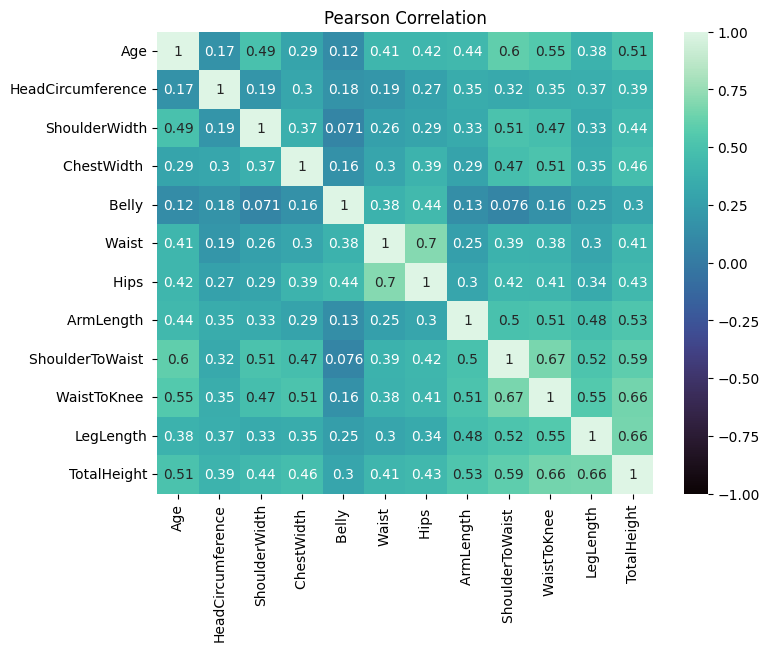

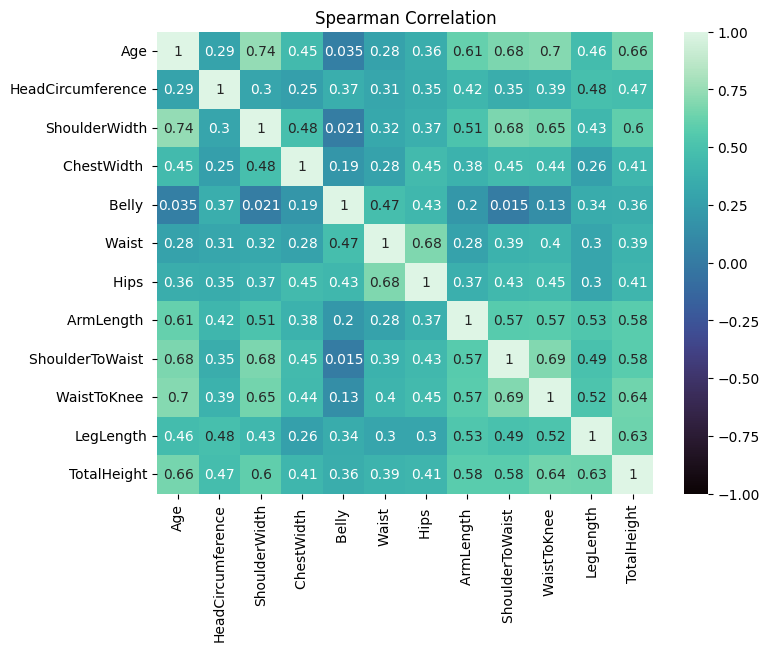

In [87]:
# correlations
corr_pearson = df[num_cols].corr(method='pearson')
corr_spearman = df[num_cols].corr(method='spearman')

fig = plt.figure(figsize = (8,6))
sns.heatmap(corr_pearson, annot=True, cmap='mako', vmin=-1, vmax=+1)
plt.title('Pearson Correlation')
plt.show()

fig = plt.figure(figsize = (8,6))
sns.heatmap(corr_spearman, annot=True, cmap='mako', vmin=-1, vmax=+1)
plt.title('Spearman Correlation')
plt.show()